# TD4: Stochastic Genetic Switch
1. Competing syntheses with cooperativity
2. Stochastic dynamics: toggle switch
3. Continuous dynamics: first-order approximation of the mean stochastic behavior

F. Fages 25 Jan 2019

Exclusive Switch (Loinger et al., Phy. Rev. E, 2007)
Two genes with common promoter 
Slow or fast binding to the promoter with rate constant k 

## Let us first consider a model with *irreversible* binding to the promotor

In [1]:
MA(s1) for DNA => DNA + X1.       % basal synthesis

In [2]:
MA(s2) for DNA => DNA + X2.

In [3]:
MA(d1) for X1 => _.                % protein degradation

In [4]:
MA(d2) for X2 => _.

In [5]:
MA(b1) for DNA + X1 => DNAX1.     % irreversible binding

In [6]:
MA(b2) for DNA + X2 => DNAX2.

In [7]:
MA(sb1) for DNAX1 => DNAX1 + X1.  % synthesis

In [8]:
MA(sb2) for DNAX2 => DNAX2 + X2.

In [9]:
parameter(s1=1, d1=1, b1=1).
parameter(s2=1, d2=1, b2=1).
parameter(sb1=10, sb2=10).

In [10]:
option(stochastic_conversion:1). % concentration=1 means 1 molecules

In [11]:
present(DNA, d). parameter(d=1). % initially only DNA 

### Reaction graph analysis: conservation laws between free DNA and bound DNAX1, DNAX2
* computation based on the *reaction graph* structure
 * Petri net place-invariants as structural conservation laws for the ODE semantics
 * constraint logic programming algorithm [(Soliman12amb)](https://lifeware.inria.fr/wiki/Main/Publications#Soliman12amb)

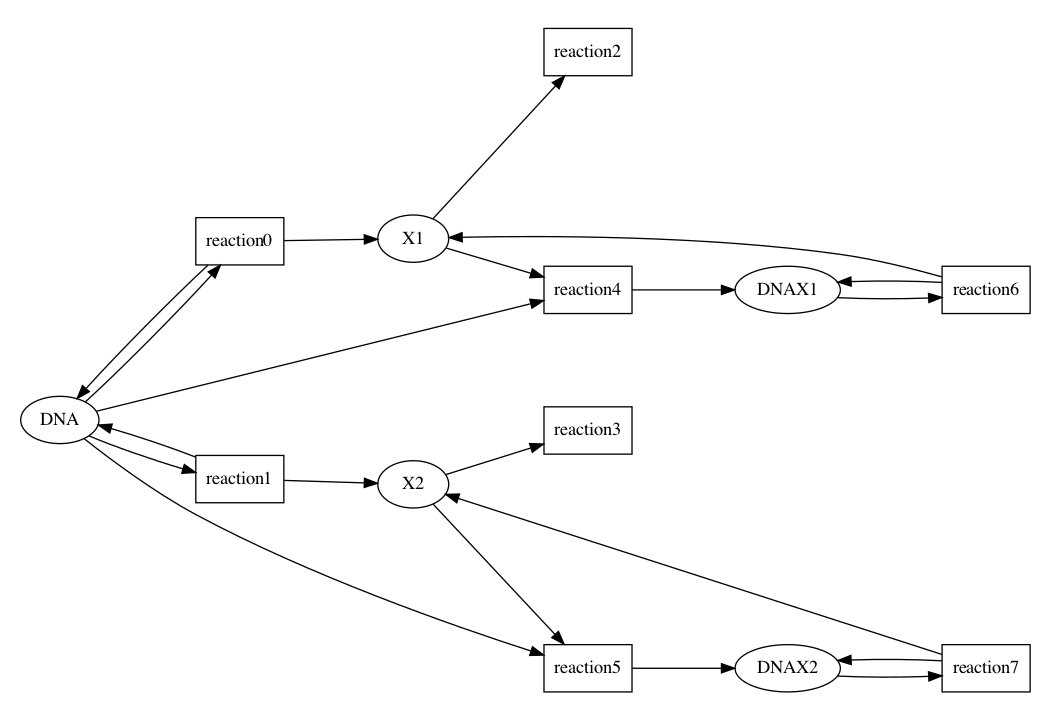

In [12]:
draw_reactions.

In [13]:
search_conservations.

DNA+DNAX1+DNAX2
1 complex invariant(s)


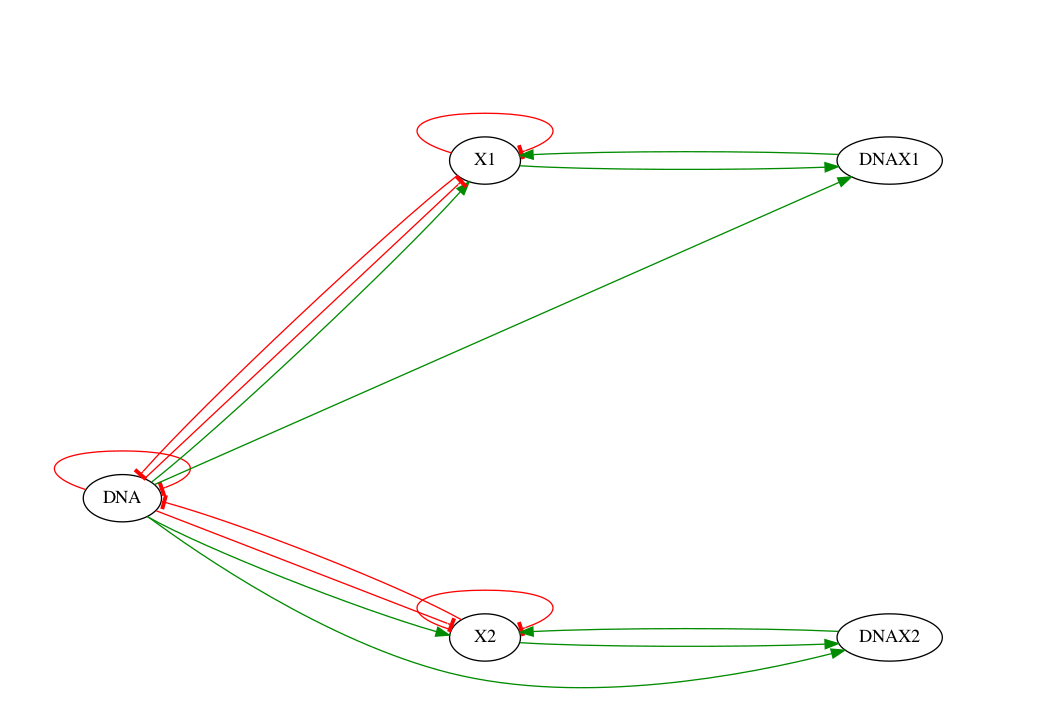

In [14]:
draw_influences.

## Stochastic dynamics

In [15]:
option(time:200, method:ssa).

In [16]:
numerical_simulation. plot.

### Slow vs fast binding rates of the promotors X1 X2
* Fast binding rates create cooperativity and a toggle switch stochastic behavior, i.e. **stochastic bistability**
* Slow binding rates delete cooperativity and create oscillating behavior

In [17]:
%slider b1 b2 sb1 sb2

Box(children=(SelectionSlider(continuous_update=False, description='b1', index=10, layout=Layout(min_width='30…

In [18]:
plot(show:X2, against:X1).

## Boolean semantics
* possible stability of DNAX1 or DNAX2 or no free DNA
* possible boolean oscillations for X1 and X2 
* (oscillations are not expressible in Computation Tree Logic CTL, an over-approximation formula is used)

In [19]:
generate_ctl_not.

reachable(stable(DNAX1))
reachable(stable(DNAX2))
reachable(stable(not DNA))
reachable(steady(DNA))
reachable(steady(X1))
reachable(steady(X2))
reachable(steady(not X1))
reachable(steady(not X2))
oscil(X1)
oscil(X2)


In [20]:
expand_ctl(stable(x)).

AG(x)


In [21]:
expand_ctl(steady(x)).

EG(x)


In [22]:
expand_ctl(oscil(f)).

EU(not f,f/\EU(f,not f/\EU(not f,f/\EU(f,not f/\EU(not f,f)))))/\EG(EF(f)/\EF(not f))


In [23]:
check_ctl(query:reachable(stable(not X1)), boolean_trace:yes).

Trace:
present({DNA, DNAX1}).

reachable(stable(not X1)) is false


In [24]:
make_absent_not_present.

In [25]:
generate_ctl_not.

reachable(stable(DNAX1))
reachable(stable(DNAX2))
reachable(stable(not DNA))
reachable(stable(not X1))
reachable(stable(not X2))
reachable(stable(not DNAX1))
reachable(stable(not DNAX2))
reachable(steady(DNA))
reachable(steady(X1))
reachable(steady(X2))
checkpoint2(DNA,X1)
checkpoint2(DNA,X2)
checkpoint2(DNA,DNAX1)
checkpoint2(X1,DNAX1)
checkpoint2(DNA,DNAX2)
checkpoint2(X2,DNAX2)
checkpoint2(not X2,X1)
checkpoint2(not DNAX1,X1)
checkpoint2(not DNAX2,X1)
checkpoint2(not X1,X2)
checkpoint2(not DNAX1,X2)
checkpoint2(not DNAX2,X2)
checkpoint2(not X1,DNAX1)
checkpoint2(not X2,DNAX1)
checkpoint2(not DNAX2,DNAX1)
checkpoint2(not X1,DNAX2)
checkpoint2(not X2,DNAX2)
checkpoint2(not DNAX1,DNAX2)
checkpoint2(not X1,not DNA)
checkpoint2(not X2,not DNA)
checkpoint2(not DNAX1,not DNA)
checkpoint2(not DNAX2,not DNA)
oscil(X1)
oscil(X2)


## Continuous semantics
* Deterministic semantics
* No continous multistationarity proved above
* First-order approximation of the mean stochastic behavior
* Same picture for slow and fast binding rates

In [26]:
parameter(b1=1, b2=1). option(method:rsbk). 

In [27]:
numerical_simulation. plot.

In [28]:
plot(show:X2, against:X1).

In [29]:
%slider b1 b2

Box(children=(SelectionSlider(continuous_update=False, description='b1', index=10, layout=Layout(min_width='30…

In [30]:
plot(show:X2, against:X1).

### Multistationarity analysis
* computation based on the *influence graph*
 * existence of positive circuit as necessary condition for multistationarity in the continuous semantics [(Soliman13bmb)](https://lifeware.inria.fr/wiki/Main/Publications#Soliman13bmb)
 * graph rewriting algorithm [(BFS18jtb)](https://lifeware.inria.fr/wiki/Main/Publications#BFS18jtb)
 * existence of negative circuits as necessary condiiton for oscillation (Thomas 1977, Snoussi 1993)

In [31]:
check_multistability.

There is no multiple steady states with non-zero values, no positive circuit
(using change of sign for species : X2 X1 DNA )


# Questions
### 1) make the bindings to the promotor *reversible*, with parameters u1, u2


### 2) Do stochastic simulations and explain the differences with the previous stochastic behavior

*use the cells below for stochastic simulations, possibly Boolean model-checking, and*

*explain your answer here*

*...*


### 3) Give parameter values to b1, b2, sb1, sb2 to recover similar stochastic behavior as before

*use the cells below for stochastic simulations with sliders and*

*give your answer here*

*...*